In [ ]:
zip_path = '/content/drive/My\ Drive/Datasets/santa-dataset.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/santa-dataset.zip -d /content

# !rm /content/santa-dataset.zip

replace /content/santa-dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from keras.layers import LeakyReLU
from numpy.random import seed

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [ ]:

model = Sequential()
# model.add(Conv2D(32, (3, 3), activation=LeakyReLU(alpha=0.1), kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
# model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)
# opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 200, 200, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 128)     73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               40960128  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:

dataset_dir = '/content/santa-dataset'

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_aug_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_aug_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

# train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
# test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:

history_base_model = model.fit_generator(train_aug_iterator, steps_per_epoch=len(train_aug_iterator), validation_data=test_aug_iterator, validation_steps=len(test_aug_iterator), epochs=75)

Epoch 1/75
6/6 [==============================] - 22s 4s/step - loss: 0.7962 - accuracy: 0.5211 - val_loss: 0.6753 - val_accuracy: 0.5000
Epoch 2/75
6/6 [==============================] - 20s 3s/step - loss: 0.6895 - accuracy: 0.5045 - val_loss: 0.6815 - val_accuracy: 0.5269
Epoch 3/75
6/6 [==============================] - 19s 3s/step - loss: 0.6737 - accuracy: 0.5695 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 4/75
6/6 [==============================] - 18s 3s/step - loss: 0.6715 - accuracy: 0.5937 - val_loss: 0.6547 - val_accuracy: 0.5000
Epoch 5/75
6/6 [==============================] - 19s 3s/step - loss: 0.6585 - accuracy: 0.5861 - val_loss: 0.6321 - val_accuracy: 0.6923
Epoch 6/75
6/6 [==============================] - 19s 3s/step - loss: 0.6195 - accuracy: 0.6677 - val_loss: 0.5981 - val_accuracy: 0.6846
Epoch 7/75
6/6 [==============================] - 20s 3s/step - loss: 0.5993 - accuracy: 0.6918 - val_loss: 0.6447 - val_accuracy: 0.5192
Epoch 8/75
6/6 [==================

In [ ]:
history_df = pd.DataFrame(history_base_model.history)
history_df['epoch'] = history_base_model.epoch
history_df

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.796222,0.521148,0.675337,0.500000,0
1,0.689546,0.504532,0.681474,0.526923,1
2,0.673724,0.569486,0.692488,0.500000,2
3,0.671527,0.593656,0.654699,0.500000,3
4,0.658529,0.586103,0.632083,0.692308,4
...,...,...,...,...,...
70,0.123618,0.956193,0.294702,0.900000,70
71,0.118419,0.959215,0.305498,0.892308,71
72,0.123593,0.941088,0.327823,0.880769,72
73,0.128306,0.959215,0.264460,0.911538,73


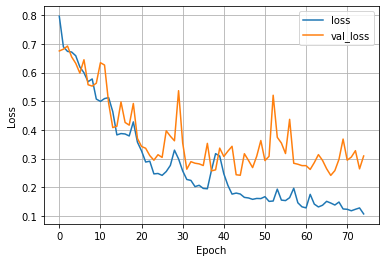

In [ ]:
plot_loss(history_base_model)

Hasil terbaik model ini

---
Epoch 67/75 [==============================] - 20s 3s/step - loss: 0.1453 - accuracy: 0.9441 - val_loss: 0.2417 - val_accuracy: 0.9231
